<a href="https://colab.research.google.com/github/nhthinh/CS2225.CH1501/blob/master/PassportMaker_Nhom8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd /content

# verify CUDA
!/usr/local/cuda/bin/nvcc --version
!git clone https://github.com/nhthinh/CS2225.CH1501.git


/content
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Cloning into 'CS2225.CH1501'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 28 (delta 7), reused 21 (delta 3), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [26]:
print('importing...')
from google.colab import files
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image as Img
import matplotlib.pyplot as plt
import cv2
import glob

print('Done!')

importing...
Done!


In [ ]:
# Step 1
%cd /content/CS2225.CH1501/input
uploaded = files.upload()



[Errno 2] No such file or directory: '/content/input'
/content


KeyboardInterrupt: ignored

/content/CS2225.CH1501
input image path = /content/CS2225.CH1501/input/anhinput.jpg


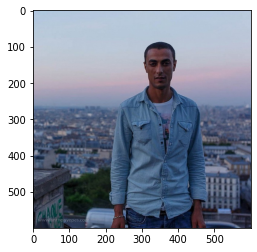

In [4]:
#Display image input
%cd /content/CS2225.CH1501
image_dir =  os.path.join(os.getcwd(), 'input')

input_image =  glob.glob(image_dir + os.sep + '*')[0]
print('input image path = '+ input_image)
input = load_img(input_image)
plt.imshow(input)

In [5]:
# Step 2 separate object and background

!python -W ignore removebackground.py


['/content/CS2225.CH1501/input/anhinput.jpg']
inferencing: anhinput.jpg


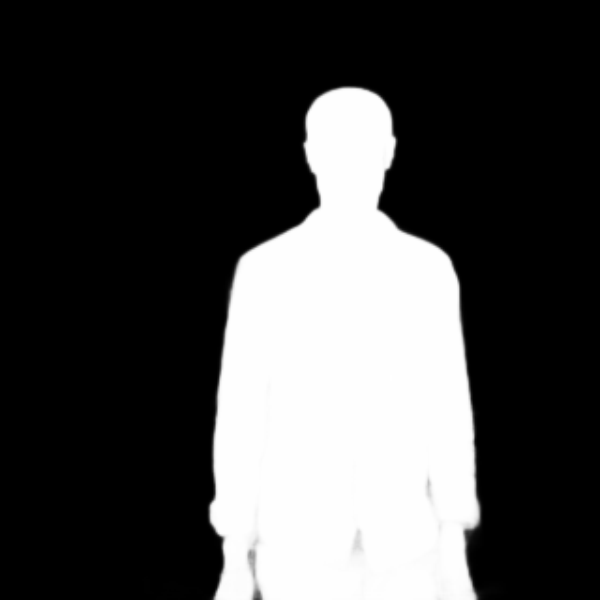

In [13]:


image_dir = os.path.join(os.getcwd(), 'output')
img_out_path = glob.glob(image_dir+"/*.png")[0]

output = load_img(img_out_path)
display(output)

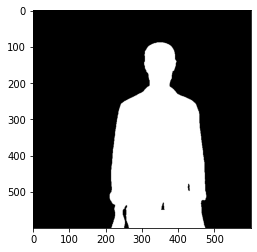

In [11]:
#Step 3 


RESCALE = 255
out_img = img_to_array(output)
out_img /= RESCALE
import matplotlib.pyplot as plt
# define the cutoff threshold below which, background will be removed.
THRESHOLD = 0.9

# refine the output
out_img[out_img > THRESHOLD] = 1
out_img[out_img <= THRESHOLD] = 0
plt.imshow(out_img)
shape = out_img.shape
a_layer_init = np.ones(shape = (shape[0],shape[1],1))
mul_layer = np.expand_dims(out_img[:,:,0],axis=2)
a_layer = mul_layer*a_layer_init
rgba_out = np.append(out_img,a_layer,axis=2)


'anhinput_out'

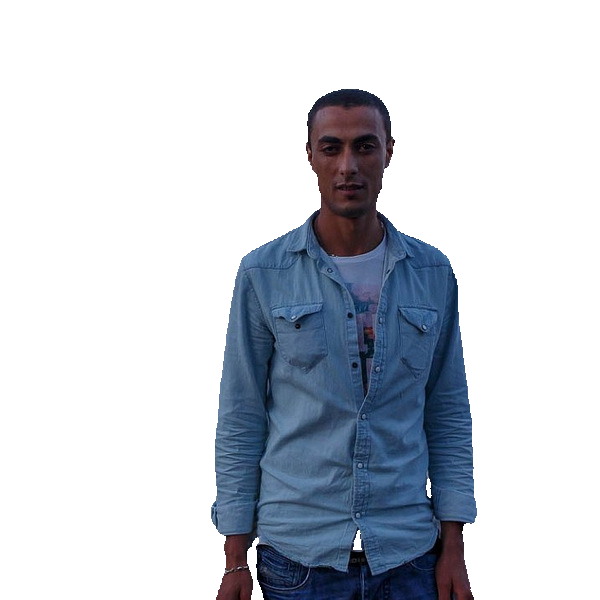

In [19]:
#Step 4 merging layers
# load and convert input to numpy array and rescale(255 for RBG images)
base=os.path.basename(img_out_path)
name = os.path.splitext(base)[0]
name
input = load_img(input_image)
inp_img = img_to_array(input)
inp_img /= RESCALE
a_layer = np.ones(shape = (shape[0],shape[1],1))
rgba_inp = np.append(inp_img,a_layer,axis=2)
rem_back = (rgba_inp*rgba_out)
rem_back_scaled = Img.fromarray((rem_back*RESCALE).astype('uint8'), 'RGBA')
display(rem_back_scaled)
out_dir =  os.path.join(os.getcwd(), 'output')
rem_back_scaled.save(out_dir+'/'+name+'_background_removed.png')

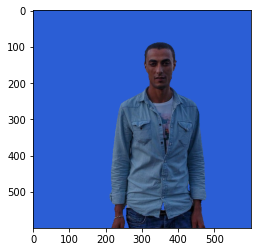

In [33]:
#Step 6 Fill blue background
im = Img.open(out_dir+'/'+name+'_background_removed.png')
bg = Img.new("RGB", im.size, (43,94,213))
bg.paste(im,im)
bg.save('/content/CS2225.CH1501/facein/'+name+'.jpg')
#input = load_img(input_image)
plt.imshow(bg)

/content/CS2225.CH1501
Number of images:  2
loaded model
--------------------------
inferencing  0 / 2 ./facein/anhinput_out_fillblue.jpg
face: [293 105 112 112]
128.8
--------------------------
inferencing  1 / 2 ./facein/anhinput_out.jpg
face: [293 105 112 112]
128.8


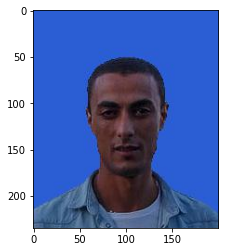

In [37]:
# Step 7
# Before running this step, pls make sure the file u2net_portrait.pth exists in model folder. link file : https://drive.google.com/file/d/1IG3HdpcRiDoWNookbncQjeaPN28t90yW/view?usp=sharing
# this model is too large to upload to github, so we include link here for downloading
%cd /content/CS2225.CH1501
!python -W ignore facecrop.py
passport_img_path = '/content/CS2225.CH1501/faceout/'+name+'.png'
passport_img = Img.open(passport_img_path)
plt.imshow(passport_img)


In [35]:
# Step 8  Download result

files.download(passport_img_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>